In [1]:
from sklearn import datasets
import keras as K
from keras import models
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
n_samples = 2000
feat, labels = datasets.make_moons(n_samples=n_samples, noise=0.05)
print(feat.shape, labels.shape)
labels = to_categorical(labels, num_classes=2)
print(feat.shape, labels.shape)

(2000, 2) (2000,)
(2000, 2) (2000, 2)


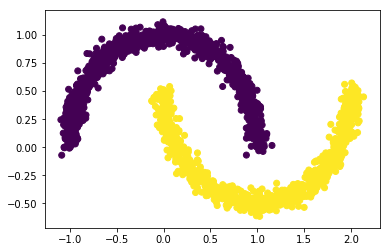

In [7]:
plt.scatter(feat[:,0], feat[:,1], c=np.argmax(labels, axis=1))

In [10]:
def make_stack(n_layers=5):
    model = models.Sequential()
    for i in range(n_layers):
        model.add(Dense(2, input_shape=(2,), activation='sigmoid'))
    model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
    return model

In [11]:
K.backend.clear_session()
model = make_stack(20)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 6         
__________

In [12]:
model.fit(feat, labels, verbose=1, epochs=100)

Epoch 1/100
2000/2000 [==============================] - 1s 531us/step - loss: 0.6948 - acc: 0.5000
Epoch 2/100
2000/2000 [==============================] - 0s 85us/step - loss: 0.6937 - acc: 0.5000
Epoch 3/100
2000/2000 [==============================] - 0s 85us/step - loss: 0.6934 - acc: 0.5000
Epoch 4/100
2000/2000 [==============================] - 0s 85us/step - loss: 0.6933 - acc: 0.5000
Epoch 5/100
2000/2000 [==============================] - 0s 86us/step - loss: 0.6933 - acc: 0.5000
Epoch 6/100
2000/2000 [==============================] - 0s 87us/step - loss: 0.6933 - acc: 0.4875
Epoch 7/100
2000/2000 [==============================] - 0s 86us/step - loss: 0.6932 - acc: 0.5000
Epoch 8/100
2000/2000 [==============================] - 0s 86us/step - loss: 0.6932 - acc: 0.5000
Epoch 9/100
2000/2000 [==============================] - 0s 87us/step - loss: 0.6932 - acc: 0.5000
Epoch 10/100
2000/2000 [==============================] - 0s 87us/step - loss: 0.6933 - acc: 0.4900
Epoch 11

2000/2000 [==============================] - 0s 104us/step - loss: 0.6932 - acc: 0.4915
Epoch 83/100
2000/2000 [==============================] - 0s 105us/step - loss: 0.6932 - acc: 0.4920
Epoch 84/100
2000/2000 [==============================] - 0s 107us/step - loss: 0.6932 - acc: 0.4980
Epoch 85/100
2000/2000 [==============================] - 0s 101us/step - loss: 0.6933 - acc: 0.5000
Epoch 86/100
2000/2000 [==============================] - 0s 101us/step - loss: 0.6932 - acc: 0.4885
Epoch 87/100
2000/2000 [==============================] - 0s 112us/step - loss: 0.6932 - acc: 0.5000
Epoch 88/100
2000/2000 [==============================] - 0s 107us/step - loss: 0.6932 - acc: 0.4895
Epoch 89/100
2000/2000 [==============================] - 0s 112us/step - loss: 0.6932 - acc: 0.4830
Epoch 90/100
2000/2000 [==============================] - 0s 104us/step - loss: 0.6933 - acc: 0.4895
Epoch 91/100
2000/2000 [==============================] - 0s 118us/step - loss: 0.6933 - acc: 0.5000
Epo

In [13]:
def get_layer(inp, out, trained_model):
    return K.backend.function([trained_model.layers[inp].input], [trained_model.layers[out].output])

def tranformations(input_model, data):
    activations = []
    for i in range(len(input_model.layers)):
        out = get_layer(0, i, input_model)
        activations.append(out([data]))
    return activations

In [14]:
activations = tranformations(model, feat)
#print(activations[1])
print(len(activations), activations[0][0].shape)

[array([[0.5228354 , 0.41009325],
       [0.590956  , 0.3788987 ],
       [0.6232172 , 0.35290197],
       ...,
       [0.58750594, 0.37298143],
       [0.63759136, 0.33979902],
       [0.51166445, 0.41823292]], dtype=float32)]
20 (2000, 2)


In [99]:
def morphs(activations, labels):
    trace_list = []
    n_rows = 1 if ((len(activations)) < 10) else (len(activations)//10)
    fig = tools.make_subplots(rows=n_rows, cols=(10))
    for i in range(1, len(activations)+1):
        fig.append_trace(go.Scatter(x=activations[i-1][0][:,0], y = activations[i-1][0][:,1] , mode='markers', marker=dict(color=labels)), -(-i//10), 10 if i%10==0 else i%10)
    fig['layout'].update(height=600)
    plot(fig)

In [100]:

#print(np.argmax(labels, axis=1))
morphs(activations, np.argmax(labels, axis=1))

This is the format of your plot grid:
[ (1,1) x1,y1 ]     [ (1,2) x2,y2 ]     [ (1,3) x3,y3 ]     [ (1,4) x4,y4 ]     [ (1,5) x5,y5 ]     [ (1,6) x6,y6 ]     [ (1,7) x7,y7 ]     [ (1,8) x8,y8 ]     [ (1,9) x9,y9 ]     [ (1,10) x10,y10 ]
[ (2,1) x11,y11 ]   [ (2,2) x12,y12 ]   [ (2,3) x13,y13 ]   [ (2,4) x14,y14 ]   [ (2,5) x15,y15 ]   [ (2,6) x16,y16 ]   [ (2,7) x17,y17 ]   [ (2,8) x18,y18 ]   [ (2,9) x19,y19 ]   [ (2,10) x20,y20 ]

